Nama  : San Antonio Limbong

NIM   : 12S19033

### Latihan 1 | Regresi Linear Sederhana


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#### Latihan 1.1 | Data Preparation
#### Membaca Data

In [2]:
df = pd.read_csv('FuelConsumptionCo2.csv')

#melihat datset
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

#### Eksplorasi Data

In [3]:
#merangkum data
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [4]:
#Beberapa fitur dapat dieksplorasi dengan cara berikut
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267
9         2.4          4                   9.2           212

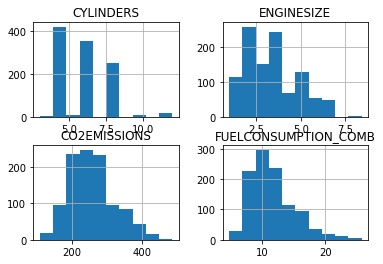

In [5]:
#Fitur fitur tersebut juga dapat di plot sebagai berikut
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

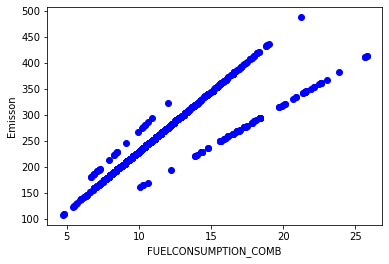

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emisson")
plt.show

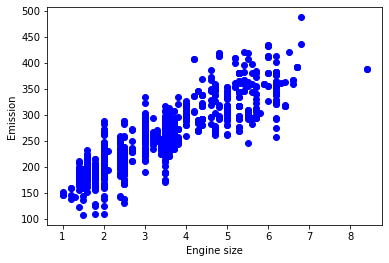

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Tugas - Buatlah plot CYLINDER vs the Emission, untuk melihat hubungan linearnya.

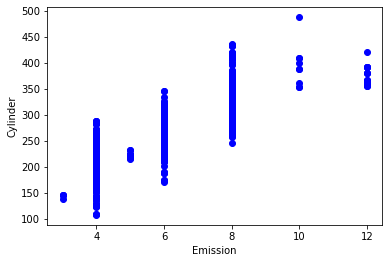

In [8]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Emission")
plt.ylabel("Cylinder")
plt.show()

#### Latihan 1.2 | Pembuatan dataset pelatihan dan pengujian

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

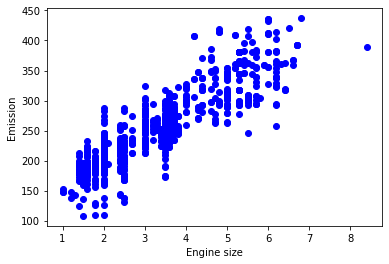

In [10]:
#untuk meminimalkan 'jumlah kuadrat sisa (residu)' antara x bebas dalam kumpulan data, dan y tak bebas dengan pendekatan linier dapat menggunakan Regresi Linier dengan  dengan koefisien B = (B1, ..., Bn) 

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Pemodelan

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
                              
#The coefficients                              
print('coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)   

coefficients:  [[39.3466572]]
Intercept:  [124.60166298]


Koefisien dan intercept dalam regresi linier sederhana, adalah
parameter dari garis yang cocok dengan data. Mengingat bahwa ini adalah regresi linier
sederhana, dengan hanya 2 parameter, dan mengetahui bahwa parameternya adalah intercept
dan kemiringan atau gradien garis (koefisien), sklearn dapat memperkirakannya langsung dari
data. Perhatikan bahwa semua data harus tersedia untuk menghitung parameter.

#### Plot output model

Text(0, 0.5, 'Emission')

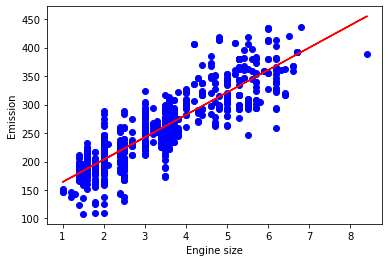

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Latihan 1.3 | Evaluasi
Nilai aktual dan nilai prediksi dapat dibandingkan untuk menghitung akurasi dari model regresi

Ada berbagai metrik untuk evaluasi model:
-  Mean Absolute Error (MAE): Rerata dari nilai absolut dari error.
-  Mean Squared Error (MSE): adalah rerata dari error dikuadratkan.
-  Root Mean Squared Error (RMSE).
-  R-squared bukan error namun metrik yang populer yang merepresentasikan sejauh mana data cocok dengan garis regresi yang didapatkan. Semakin besar R-squared akan semakin baik pencocokan garis terhadap data. Nilai terbaik adalah 1.0 dan dapat bernilai negatif.

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 22.70
Residual sum of squares (MSE): 911.72
R2-score: 0.71


### Latihan 2 | Regresi Linear Variabel Jamak
#### Latihan 2.1 | Pembuatan dataset pelatihan dan pengujian

In [14]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Regresi Linier cocok dengan model linier dengan koefisien B = (B1, ..., Bn) untuk meminimalkan
'jumlah kuadrat sisa (residu)' antara x bebas (X1, ..., Xn) dalam kumpulan data, dan y tak bebas
dengan pendekatan linier. Distribusi Data Pelatihan dapat dilihat dengan kode program berikut
ini:


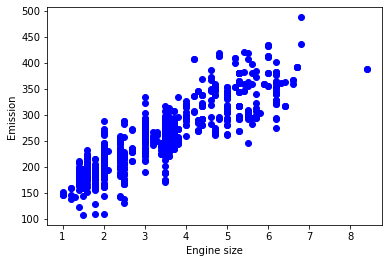

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Pemodelan

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
                              
#The coefficients                              
print('coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)    

coefficients:  [[39.1485713]]
Intercept:  [125.58064932]


#### Plot output model

Text(0, 0.5, 'Emission')

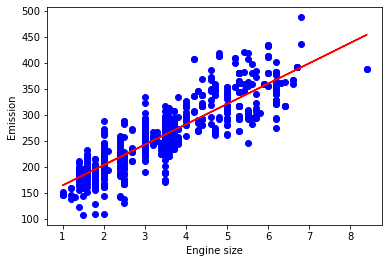

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Latihan 2.2 | Evaluasi

In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print ("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y) )

Mean absolute error: 21.79
Residual sum of squares (MSE): 803.85
R2-score: 0.72


### Latihan 3 | Regression Non-Linear

Meskipun regresi linier sangat baik untuk menyelesaikan banyak masalah, namun tidak dapat
digunakan untuk semua jenis dataset.

Meskipun regresi linier sangat baik untuk menyelesaikan banyak masalah, namun tidak dapat
digunakan untuk semua jenis dataset.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

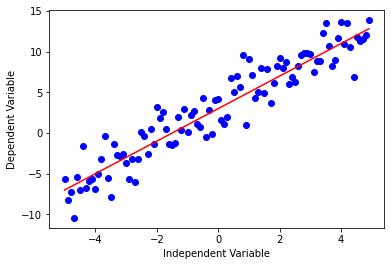

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
# plt.figure(figsize(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

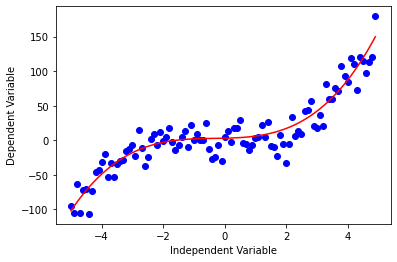

In [21]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Latihan 3.1 | Kuadratik: Y = X^2

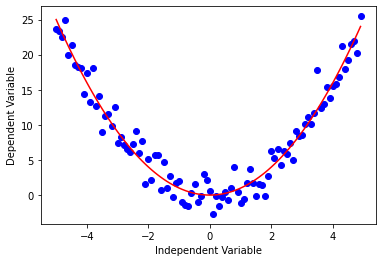

In [22]:
x = np.arange(-5.0, 5.0, 0.1)

# You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Latihan 3.2 | Eksponensial

Fungsi eksponensial dengan basis c didefinisikan oleh
𝑌=𝑎+𝑏𝑐^𝑋
di mana b 0, c > 0, c 1, dan x adalah bilangan real apa pun. Basis, c, adalah konstan dan
eksponen, x, adalah variabel.

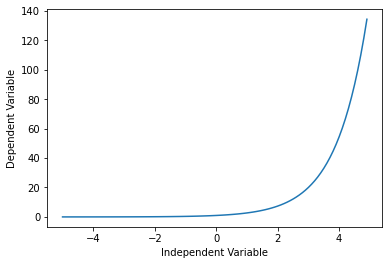

In [23]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Latihan 3.3 | Logaritmik

Respon 𝑦 adalah hasil penerapan peta logaritmik dari input 𝑥 ke variabel output 𝑦. Berikut
adalah salah satu bentuk paling sederhana dari log (): yaitu
𝑦=log(𝑥)
Perlu dipertimbangkan bahwa alih-alih 𝑥, kita dapat menggunakan 𝑋 , yang dapat berupa
representasi polinomial dari 𝑥 . Dalam bentuk umum itu akan ditulis sebagai
𝑦=log(𝑋)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17192\2233958358.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


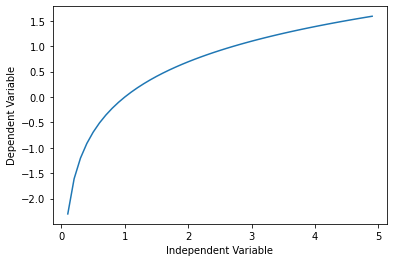

In [24]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Latihan 3.4 | Sigmoid/logistic

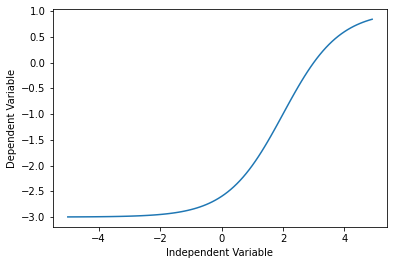

In [25]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Latihan 3.5 | Contoh Regresi Non-Linier

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('china_gdp.csv')
dataset.head(10)

Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10
5  1965  6.970915e+10
6  1966  7.587943e+10
7  1967  7.205703e+10
8  1968  6.999350e+10
9  1969  7.871882e+10

#### Memplot dataset

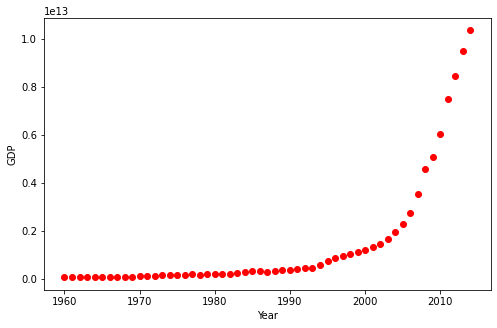

In [27]:
plt.figure(figsize=(8,5))
x_data, y_data = (dataset["Year"].values, dataset["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

#### Pemilihan Model

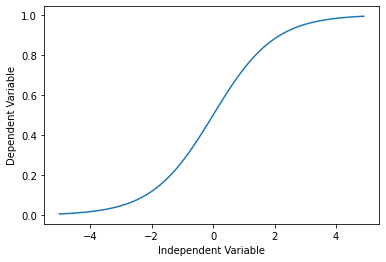

In [28]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Pembuatan Model

In [29]:
def sigmoid(x, Beta_1, Beta_2):
      y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
      return y

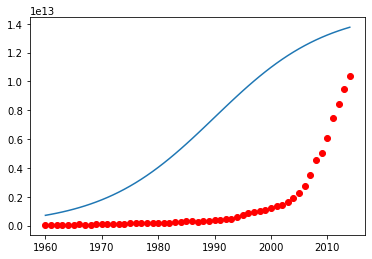

In [30]:
beta_1 = 0.10
beta_2 = 1990.0
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)
#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [31]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [32]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


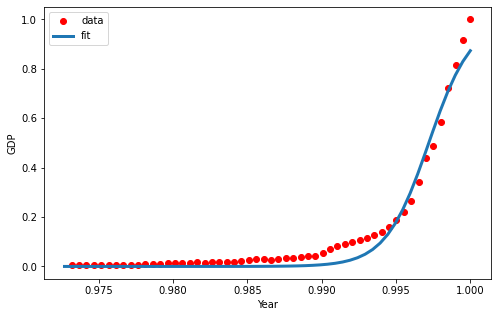

In [33]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

#### TUGAS

In [34]:
# split data into train/test
msk = np.random.rand(len(dataset)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.26
Residual sum of squares (MSE): 0.21
R2-score: -8219193960094800408135226762494738432.00


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Latihan 4 | Decision Tree (Contoh – 1)
#### Latihan 4.1 | Basic Implementation
Decision Tree untuk regresi sangat mirip dengan Decision Tree untuk klasifikasi. Decision Tree
Regression (DTR) membangun model regresi dalam bentuk struktur pohon. DTR memecah
dataset menjadi subset yang lebih kecil dan lebih kecil sementara pada saat yang sama pohon
keputusan terkait dikembangkan secara bertahap.

Prosedur untuk
mengem- bangkan model regresi terdiri dari empat bagian:
1. Muat data set.
2. Pisahkan set ke dalam subset pelatihan / pengujian.
3. Instantiate pohon keputusan regressor dan latihlah.
4. Evaluasi performa model dengan subset tes.

In [35]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure', \
                  'bl_0', 'bl_1', 'bl_2', 'bl_3', 'bl_4', 'bl_5']

<AxesSubplot:>

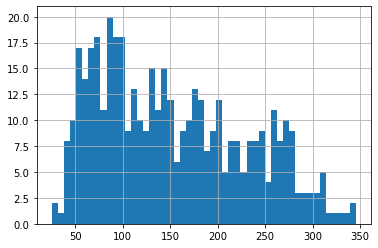

In [36]:
pd.Series(y).hist(bins=50)

In [37]:
bins = 50*np.arange(8)
bins

array([  0,  50, 100, 150, 200, 250, 300, 350])

In [38]:
binned_y = np.digitize(y, bins)

<AxesSubplot:>

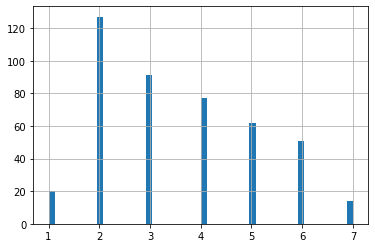

In [39]:
pd.Series(binned_y).hist(bins=50)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=binned_y)

In [41]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
y_pred = dtr.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

66.47191011235955

In [44]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.5809518604285981

#### Latihan 4.2 | Visualization

<AxesSubplot:>

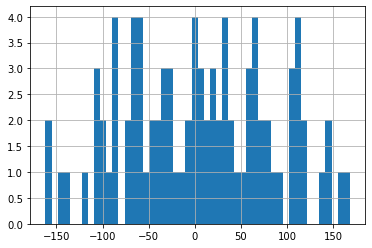

In [45]:
# Dengan pandas, Anda dapat dengan cepat memvisualisasikan distribusi kesalahan (error).
# Ubah perbedaan antara ground truth, y_test, dan y_pred, menjadi histogram.
pd.Series((y_test - y_pred)).hist(bins=50)

<AxesSubplot:>

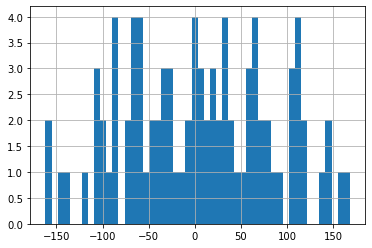

In [46]:
# Anda dapat melakukan hal yang sama untuk percentage error.

pd.Series((y_test - y_pred)).hist(bins=50)

In [47]:
# import six
# import sys
# sys.modules['sklearn.externals.six'] = six

# pip install pydot
# pip install graphviz

Anda dapat memvisualisasikan model pohon keputusan yang telah dibangun dengan
graphviz

In [48]:
import numpy as np

from sklearn import tree
# from sklearn.externals.six import StringIO
from six import StringIO

import pydot
from IPython.display import Image

dot_diabetes = StringIO()
tree.export_graphviz(dtr, out_file = dot_diabetes, feature_names = X_feature_names)
(graph,) = pydot.graph_from_dot_data(dot_diabetes.getvalue())

Image(graph.create_png())

#### Latihan 4.3 | Reduce Overfitting

In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

x = diabetes.data
y = diabetes.target

x_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure',\
                   'bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']

bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=binned_y)


Gunakan grid search yang disediakan dalam scikit-learn untuk mengurangi overfitting

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

gs_inst = GridSearchCV(dtr, param_grid = {'max_depth': [3,5,7,9,20]},
                      cv=10)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 20]})

In [51]:
gs_inst.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3,
                      max_features=None,
                      max_leaf_nodes=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=None,
                      splitter='best')


DecisionTreeRegressor(criterion='mse', max_depth=3)

In [53]:
y_pred = gs_inst.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

61.711436101098144

In [54]:
(np.abs(y_test - y_pred)/(y_test)).mean()

0.5429955068545318

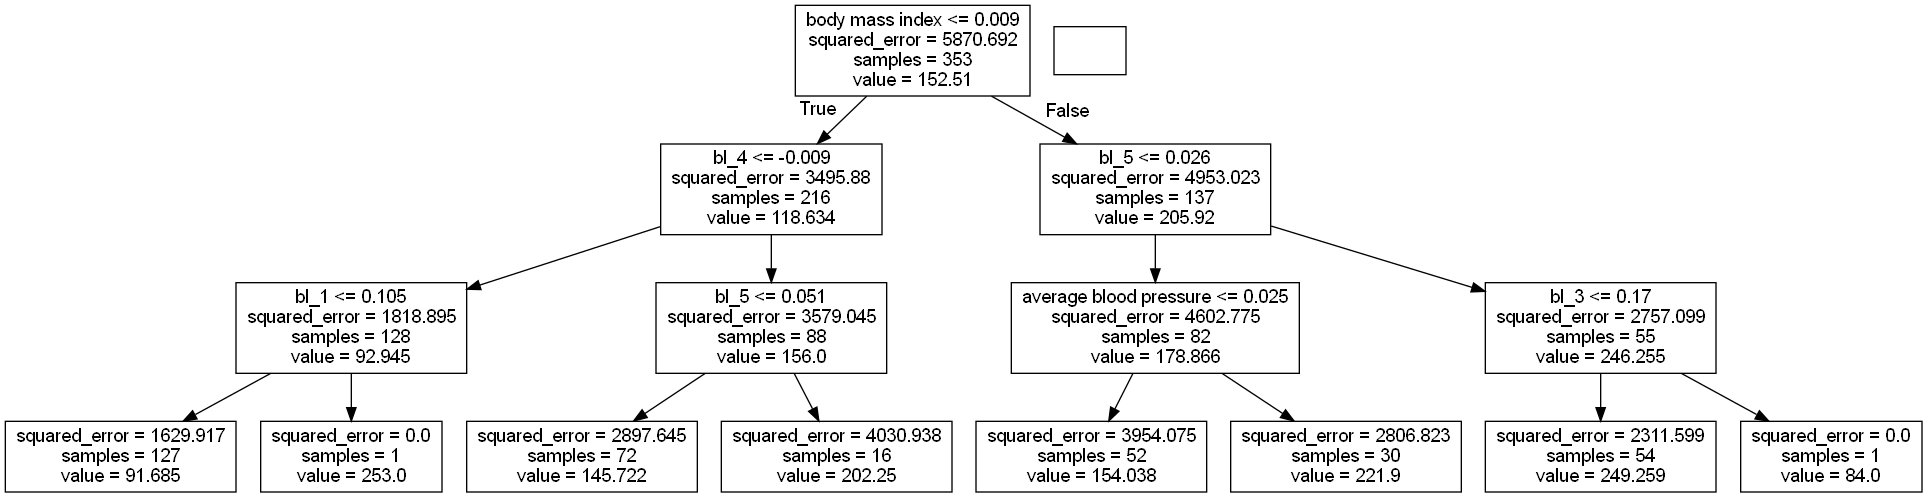

In [55]:
import numpy as np
from sklearn import tree
from six import StringIO

import pydot
from IPython.display import Image

dot_diabetes = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file = dot_diabetes,
feature_names = X_feature_names)
(graph,) = pydot.graph_from_dot_data(dot_diabetes.getvalue())

Image(graph.create_png())

### Latihan 5 | Decision Tree (Contoh – 2)

In [56]:
# Mengambil "Engine Size" sebagai variabel independen (regressor)
X = cdf.iloc[:, 0].values
# Mengambil "Emission" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "Engine Size"
X = X.reshape(-1,1) 
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [59]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor()

In [60]:
# Prediction a new result

y_pred = regressor.predict(sc_X.transform(np.array([[5.4]])))

y_pred = sc_y.inverse_transform(y_pred)

print(y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[1.84940813].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

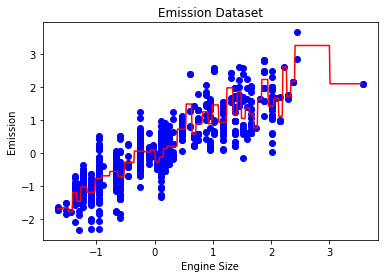

In [61]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
plt.title('Emission Dataset')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [62]:
# Visualisig the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), color = 'red'
plt.title('Emission Dataset')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

SyntaxError: invalid syntax (346796104.py, line 6)

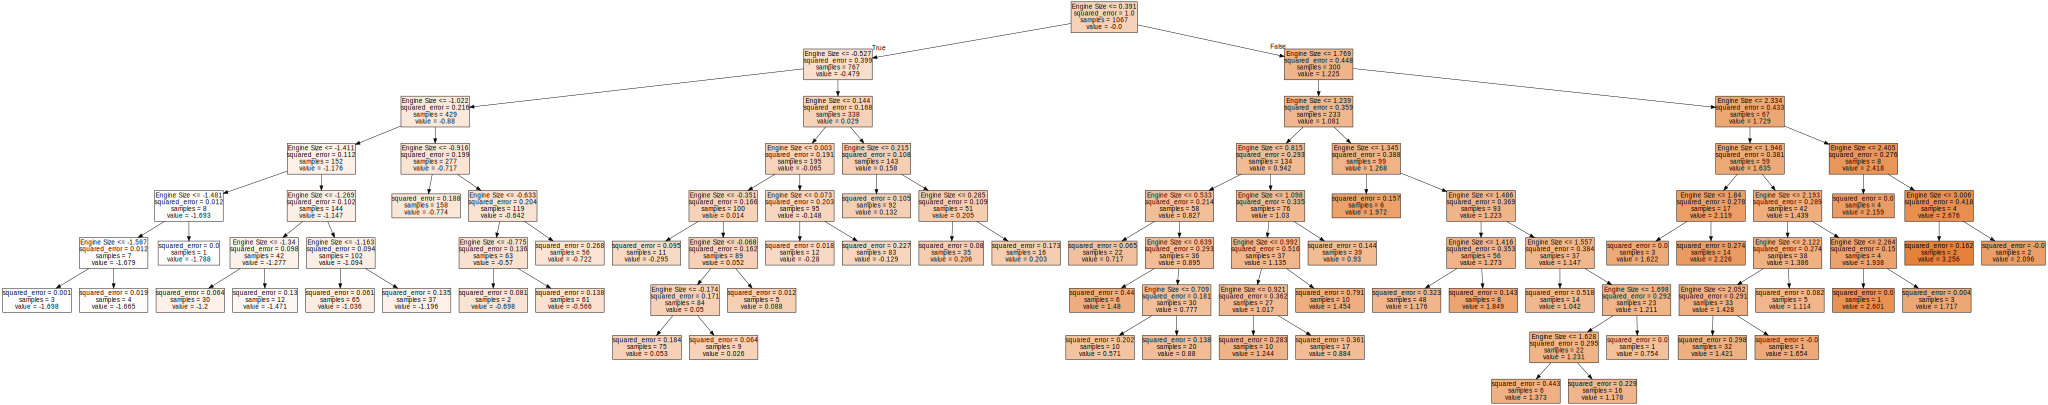

In [67]:
# import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(regressor, out_file=None, feature_names=['Engine Size'],
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [68]:
graph.render("decision_tree_graphivz")
'decision_tree_graphivz.png'

'decision_tree_graphivz.png'

In [69]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(cdf[['ENGINESIZE']])
test_y = np.asanyarray(cdf[['CO2EMISSIONS']])
test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_x)))

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) **2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

ValueError: Expected 2D array, got 1D array instead:
array=[-0.77448339 -0.56599554 -1.4705008  ...  0.05280261  0.02621001
  0.02621001].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Latihan 6 | Random Forest

Pohon Keputusan (Decision Tree) adalah algoritma yang mudah dipahami dan diinterpretasikan
dan karenanya satu pohon mungkin tidak cukup bagi model untuk mempelajari fitur-fiturnya. Di
sisi lain, Random Forest juga merupakan algoritma berbasis “Pohon” yang menggunakan fitur
kualitas dari beberapa Pohon Keputusan untuk membuat keputusan. Oleh karena itu, dapat
disebut sebagai ‘Forest’ atau ‘Hutan’ dari pohon-pohon dan karenanya disebut “Random Forest".
Istilah ‘Random’ atau ‘Acak' disebabkan oleh fakta bahwa algoritma ini adalah hutan dari 'Pohon
Keputusan atau Decision Tree yang dibuat secara acak atatu random'. Algoritma Decision Tree
memiliki kelemahan utama yaitu menyebabkan over-fitting. Masalah ini dapat diatasi dengan
menerapkan Regresi Random Forest (Random Forest Regression) sebagai pengganti DTR. Selain
itu, algoritma Random Forest juga sangat cepat dan kuat dibandingkan model regresi lainnya.


In [70]:
# Mengambil "Engine Size" sebagai variabel independen (regressor)
X = cdf.iloc[:, 0].values
# Mengambil "Emission" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "Engine Size"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

In [71]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [72]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [73]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X,y)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17192\4115711920.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,y)


RandomForestRegressor()

In [74]:
# Predicting a new result

y_pred = regressor.predict(sc_X.transform(np.array([[5.4]])))

y_pred = sc_y.inverse_transform(y_pred)

print(y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[1.86209931].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

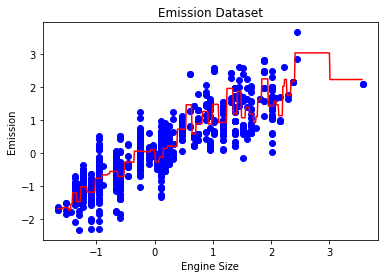

In [75]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
plt.title('Emission Dataset')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [76]:
# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), color = 'red'
plt.title('Emission Dataset')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

SyntaxError: invalid syntax (2375211822.py, line 6)

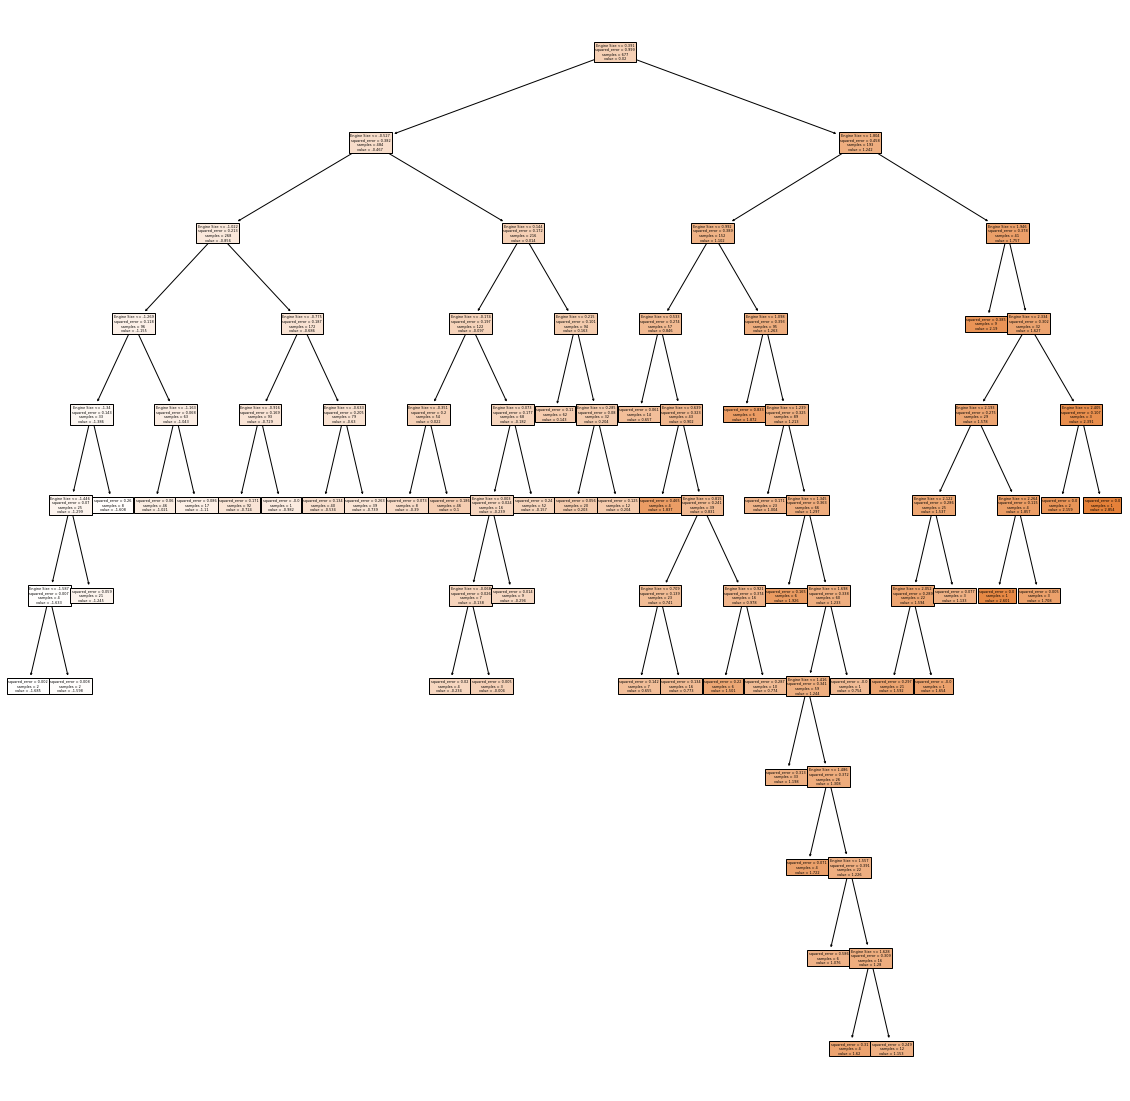

In [77]:
from sklearn import tree
plt.figure(figsize=(20,20))
graph = tree.plot_tree(regressor.estimators_[0], feature_names=['Engine Size'], filled=True)

In [78]:
from sklearn.metrics import r2_score

test_X = np.asanyarray(cdf[['ENGINESIZE']])
test_y = np.asanyarray(cdf[['CO2EMISSIONS']])
test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_X)))

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual Sum Of Squares (MSE): %.2f" % np.mean((test_y_ - test_y))) ** 2
print("R2-score: %.2f" % r2_score(test_y_, test_y))

ImportError: attempted relative import with no known parent package

### Latihan 7 | Gradient Boosting

1. Fokus pada parameter penting dalam algoritma Gradient Boosting:
    - max_features
    - max_depth
    - min_samples_leaf
    - learning_rate
    -  loss
2. Buat distribusi parameter di mana parameter paling penting bervariasi.
3. Lakukan random grid search. Jika menggunakan ensemble, pertahankan jumlah estimator rendah pada awalnya.
4. Gunakan parameter terbaik dari langkah sebelumnya dengan banyak estimator.

In [79]:
#pada bagian ini, data set perumahan California dan pisahkan data set yang dimuat ke dalam subset pelatihan dan pengujian

from __future__ import division

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

cali_housing = fetch_california_housing()

X = cali_housing.data
y = cali_housing.target

bins = np.arange(6)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=binned_y)

In [80]:
#algoritma gradient boosting dan random grid search yang ada pada scikit-learn.

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [81]:
#parameter distribution untuk gradient boosting trees

param_dist = {'max_features' : ['log2',1.0],
             'max_depth' : [3, 5, 7, 10],
             'min_samples_leaf' : [2, 3, 5, 10],
             'n_estimators' : [50, 100],
             'learning_rate' : [0.0001,0.001,0.01,0.05,0.1,0.3],
             'loss' : ['ls','huber']
             }

In [82]:
#grid search untuk menemukan nilai parameter terbaik. Lakukan Perform randomized search dengan 30 iterasi.


pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
                                param_distributions = param_dist,
                                cv=3,
                                n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)

# laporan hasil pencarian tersebut dalam bentuk dataframe. Fungsi untuk 
#menampilkan laporan tersebut dirancang umum untuk dapat digunakan berulang kali dalam pengaplikasian yang berbeda.

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(warm_start=True),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.05, 0.1, 0.3],
                                        'loss': ['ls', 'huber'],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': ['log2', 1.0],
                                        'min_samples_leaf': [2, 3, 5, 10],
                                        'n_estimators': [50, 100]})

In [83]:
import numpy as np
import pandas as pd

def get_grid_df(fitted_gs_estimator):
    res_dict = fitted_gs_estimator.cv_results_
    
    results_df = pd.DataFrame()
    for key in res_dict.keys():
        results_df[key] = res_dict[key]
        
    return results_df

def group_report(results_df):
    param_cols = [x for x in results_df.columns if 'param' in x
                 and x is not 'params']
    focus_cols = param_cols + ['mean_test_score']
    
    print("Grid CV Report \n")
    
    output_df = pd.DataFrame(columns = ['param_type','param_set', 'mean_score',\
                                       'mean_std'])
    cc = 0
    for param in param_cols:
        for key,group in results_df.groupby(param):
            output_df.loc[cc] = (param, key,
                                group['mean_test_score'].mean(),
                                group['mean_test_score'].std())
            cc += 1
    return output_df

<>:15: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:15: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17192\3477839282.py:15: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  and x is not 'params']


In [84]:
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



param_type param_set  mean_score  mean_std
0       param_n_estimators      50.0    0.536439  0.332181
1       param_n_estimators     100.0    0.591015  0.313235
2   param_min_samples_leaf       2.0    0.602035  0.286584
3   param_min_samples_leaf       3.0    0.516384  0.363608
4   param_min_samples_leaf       5.0    0.495945  0.338499
5   param_min_samples_leaf      10.0    0.669557  0.322479
6       param_max_features       1.0    0.580411  0.311920
7       param_max_features      log2    0.547044  0.334911
8          param_max_depth         3    0.537757  0.267337
9          param_max_depth         5    0.603020  0.287721
10         param_max_depth         7    0.214101  0.410366
11         param_max_depth        10    0.724663  0.266512
12              param_loss     huber    0.595569  0.268301
13              param_loss        ls    0.542499  0.353858
14     param_learning_rate    0.0001    0.008950  0.003595
15     param_learning_rate     0.001    0.063044  0.070555
16     param_learning_rate      0.01    0.401078  0.098494
17     param_learning_rate      0.05    0.755352  0.027431
18     param_learning_rate       0.1    0.805947  0.037291
19     param_learning_rate       0.3    0.810258  0.011180

In [85]:
param_dist = {'max_features' : ['sqrt',0.5,1.0],
             'max_depth' : [2,3,4],
             'min_samples_leaf' : [3, 4],
             'n_estimators' : [50, 100],
             'learning_rate' : [0.2,0.25,0.3,0.4],
             'loss' : ['ls','huber']
             }

In [86]:
pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
                                param_distributions = param_dist,
                                cv=3,
                                n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(warm_start=True),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.25, 0.3, 0.4],
                                        'loss': ['ls', 'huber'],
                                        'max_depth': [2, 3, 4],
                                        'max_features': ['sqrt', 0.5, 1.0],
                                        'min_samples_leaf': [3, 4],
                                        'n_estimators': [50, 100]})

In [87]:
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



param_type param_set  mean_score  mean_std
0       param_n_estimators      50.0    0.768901  0.022394
1       param_n_estimators     100.0    0.794533  0.018589
2   param_min_samples_leaf       3.0    0.780067  0.019071
3   param_min_samples_leaf       4.0    0.779963  0.028113
4       param_max_features       0.5    0.786090  0.021077
5       param_max_features       1.0    0.784873  0.019997
6       param_max_features      sqrt    0.765411  0.030167
7          param_max_depth         2    0.761763  0.020034
8          param_max_depth         3    0.790568  0.012579
9          param_max_depth         4    0.804979  0.013052
10              param_loss     huber    0.786054  0.020837
11              param_loss        ls    0.773961  0.026504
12     param_learning_rate       0.2    0.779994  0.026009
13     param_learning_rate      0.25    0.777662  0.014884
14     param_learning_rate       0.3    0.777564  0.027119
15     param_learning_rate       0.4    0.785326  0.029361

In [88]:
param_dist = {'max_features' : [0.4, 0.5, 0.6],
             'max_depth' : [5,6],
             'min_samples_leaf' : [4,5],
             'n_estimators' : [300],
             'learning_rate' : [0.3],
             'loss' : ['ls','huber']
             }

In [89]:
rs_gbt = GradientBoostingRegressor(warm_start=True,
                                   max_features = 0.5,
                                   min_samples_leaf = 4,
                                   learning_rate=0.3,
                                   max_depth = 6,
                                   n_estimators = 4000,loss = 'huber')

rs_gbt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, loss='huber', max_depth=6,
                          max_features=0.5, min_samples_leaf=4,
                          n_estimators=4000, warm_start=True)

In [90]:
y_pred = rs_gbt.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

print("R-squared", r2_score(y_test, y_pred))
print("MAE : ", mean_absolute_error(y_test, y_pred))
print("MAPE : ", (np.abs(y_test - y_pred)/y_test).mean())

R-squared 0.8278420855494559
MAE :  0.3155685787775811
MAPE :  0.17402394016516054


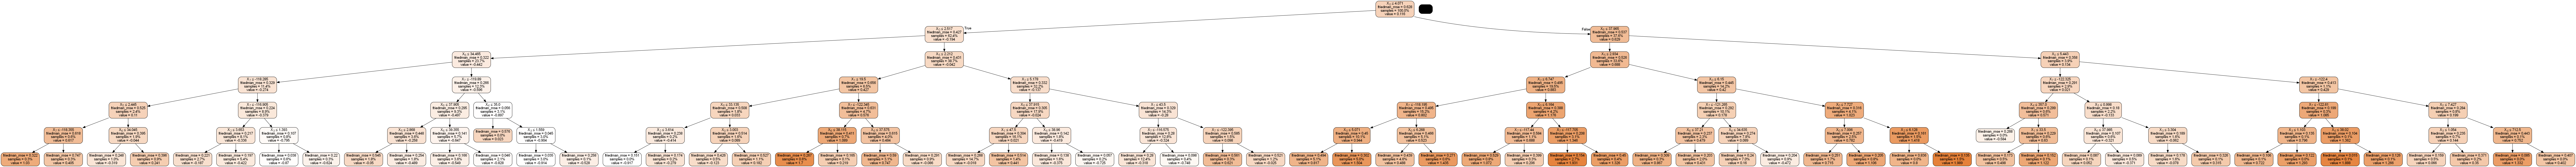

In [95]:
#memvisualisasikan pohon yang didapatkan. Misalnya, jika kita ingin memvisualisasikan pohon pertama

import numpy as np
from sklearn import tree
# from sklearn.externals.six import StringIO
from six import StringIO

import pydot
from IPython.display import Image

sub_tree_1 = rs_gbt.estimators_[1, 0]

dot_data = tree.export_graphviz(
    sub_tree_1,
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
(graph,) = pydot.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Latihan 8 | Support Vector Regression

SVR memberi fleksibilitas untuk menentukan seberapa besar kesalahan yang dapat diterima
dalam model dan akan menemukan garis yang sesuai (atau hyperplane dalam dimensi yang
lebih tinggi) agar sesuai dengan data. Berbeda dengan Least Square biasa, fungsi tujuan SVR
adalah untuk meminimalkan koefisien — lebih khusus lagi, l2-norm vektor koefisien — bukan
squared error.

In [96]:
# Mengambil "Engine Size" sebagai variabel independen (regressor)
X = cdf.iloc[:, 0].values
# Mengambil "Emission" sebagai variabel dependen
y = cdf.iloc[:, 3].values
# Reshape data karena hanya menggunakan satu fitur "Engine Size"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

In [97]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [98]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [99]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
#Linear = Linear Kernel
regressor.fit(X,y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [100]:
# Predicting a new result

y_pred = regressor.predict(sc_X.transform(np.array([[5.4]])))

y_pred = sc_y.inverse_transform(y_pred)

print(y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[1.25590014].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

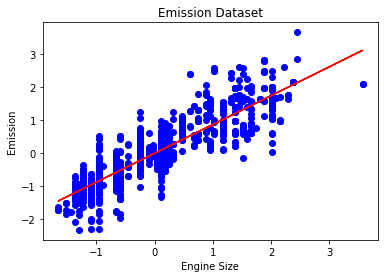

In [101]:
# Visualising the SVR results
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Emission Dataset')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[-0.84546883 -0.59824895 -1.15449368 ... -0.22741913 -0.10380919
 -0.10380919].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

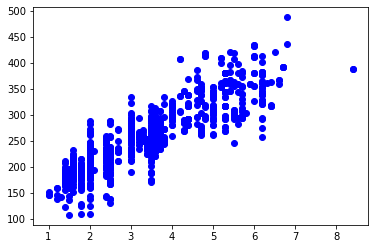

In [102]:
# Visualising the SVR results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'red')
plt.title('Eemission Dataset')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

#### Evaluasi


In [103]:
from.sklearn.metrics import r2_score

test_X = np.asanyarray(cdf[['ENGINESIZE']])
test_y = np.asanyarray(cdf[['CO2EMISSIONS']])
test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_X)))

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual Sum Of Squares (MSE): %.2f" % np.mean((test_y_ - test_y))) ** 2
print("R2-score: %.2f" % r2_score(test_y_, test_y))

ImportError: attempted relative import with no known parent package